<a href="https://colab.research.google.com/github/chandanc5525/BootCamp_2025/blob/main/Bank_Telemarketing_MLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w')
# Importing Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Importing Dataset using Pandas Function

df = pd.read_csv('bank.csv',sep = ';')

df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4112,46,admin.,married,primary,no,96,no,no,telephone,4,feb,151,2,-1,0,unknown,no
3943,45,services,single,secondary,no,1757,yes,no,cellular,20,apr,1010,3,326,1,other,no
2809,57,retired,married,primary,no,75,no,no,cellular,28,aug,118,2,-1,0,unknown,no
2869,49,services,married,secondary,no,280,yes,no,telephone,14,jul,162,3,-1,0,unknown,no
4469,36,management,divorced,tertiary,no,0,no,no,cellular,28,aug,81,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,29,admin.,single,secondary,no,428,yes,yes,cellular,7,may,54,1,345,2,failure,no
32,59,management,married,secondary,no,42,no,no,cellular,21,nov,40,1,-1,0,unknown,no
4353,30,admin.,married,tertiary,no,400,yes,no,cellular,7,may,223,1,-1,0,unknown,no
4179,34,blue-collar,divorced,secondary,no,-566,yes,no,unknown,26,may,248,2,-1,0,unknown,no


In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# Evaluate Descriptive Stats: EDA

# Step 1: Segregate Categorical columns and Numeical Columns
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64'])

In [5]:
# Step2 : Evaluate Descriptive Stats
# Univariate Analysis

from collections import OrderedDict

stats= []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Mode':df[i].mode()[0],
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Standard Deviation':df[i].std(),
      'Variance':df[i].var(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25)

  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report



,Feature,Mean,Median,Mode,Minimum,Maximum,Standard Deviation,Variance,Skewness,Kurtosis,Q1,Q3,IQR
0,age,41.170095,39.0,34,19,87,10.576211,1.118562e+02,0.699501,0.348775,33.0,49.0,16.0
1,balance,1422.657819,444.0,0,-3313,71188,3009.638142,9.057922e+06,6.596431,88.390332,69.0,1480.0,1411.0
2,day,15.915284,16.0,20,1,31,8.247667,6.802402e+01,0.094627,-1.039531,9.0,21.0,12.0
3,duration,263.961292,185.0,123,4,3025,259.856633,6.752547e+04,2.772420,12.530050,104.0,329.0,225.0
4,campaign,2.793630,2.0,1,1,50,3.109807,9.670897e+00,4.743914,37.168920,1.0,3.0,2.0
5,pdays,39.766645,-1.0,-1,-1,871,100.121124,1.002424e+04,2.717071,7.957128,-1.0,-1.0,0.0
6,previous,0.542579,0.0,0,0,25,1.693562,2.868153e+00,5.875259,51.995212,0.0,0.0,0.0


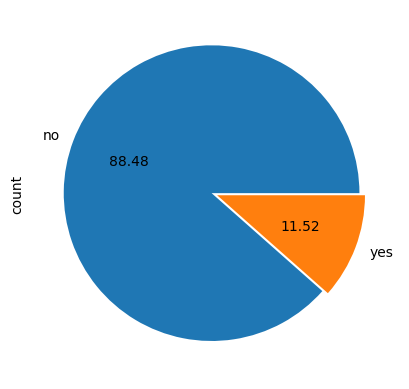

In [6]:
# Problem Definiton:
''' The dataset consist of 4521 rows and 17 columns. This dataset belongs to portugal bank where our aim is to classify whether the customer will subscribe the bank term deposite or not.

Type of machine learning model: Binary Classification

Above Dataset is a type of Multivariate Analysis.

X : Independent Columns
y : Target Column / Dependent Column

Here, 'y'acts as Target Column / Dependent Column.
'''

# Checking the distriution of people who subscribe the term deposite
'''
Based on distribution of target column, we found that the data is imbalance.
'''
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f',
                            explode = [0.02,0.02])
plt.show()

In [7]:
# Data Insights:

'''
1. 88.48% people are not subscribe bank term deposite.
2. The Average Call Duration Recorded 264 seconds.This can be one of the cause for the people who have not subscribe the bank term deposite.
3. If the call duration more than 300 seconds the chances are there that person will subscribe the bank term deposite.
4. The Target audiance is divorced people.
5. The people who have taken loan are excluded from the bank term deposite subscription.


'''

'\n1. 88.48% people are not subscribe bank term deposite.\n2. The Average Call Duration Recorded 264 seconds.This can be one of the cause for the people who have not subscribe the bank term deposite.\n3. If the call duration more than 300 seconds the chances are there that person will subscribe the bank term deposite.\n4. The Target audiance is divorced people.\n5. The people who have taken loan are excluded from the bank term deposite subscription.\n\n\n'

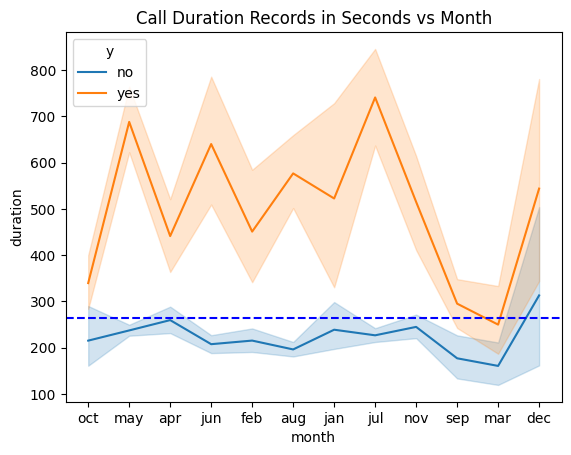

In [8]:
sns.lineplot(x = df['month'], y = df['duration'], hue = df['y'])
plt.axhline(df['duration'].mean(),linestyle = '--',c = 'b')
plt.title('Call Duration Records in Seconds vs Month')
plt.show()

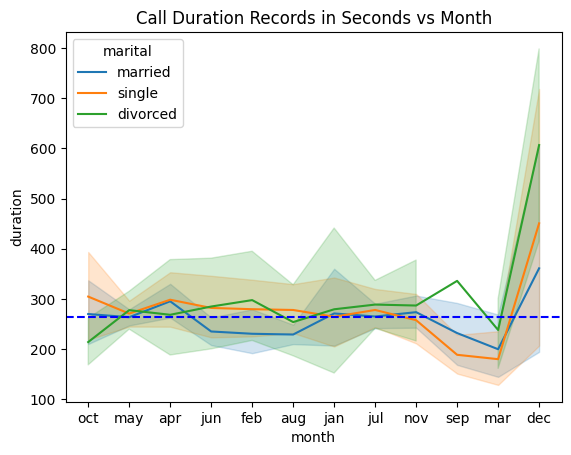

In [9]:
sns.lineplot(x = df['month'], y = df['duration'], hue = df['marital'])
plt.axhline(df['duration'].mean(),linestyle = '--',c = 'b')
plt.title('Call Duration Records in Seconds vs Month')
plt.show()

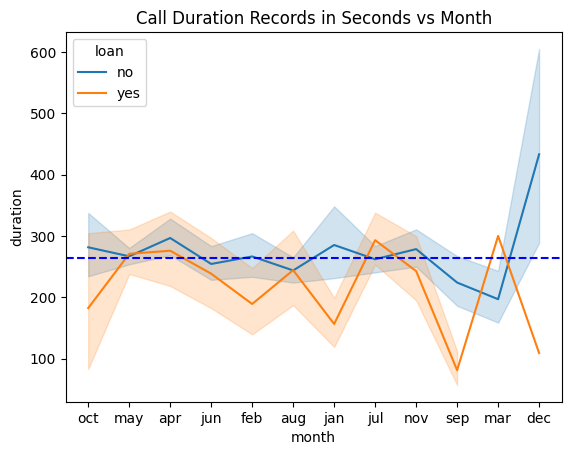

In [10]:
sns.lineplot(x = df['month'], y = df['duration'], hue = df['loan'])
plt.axhline(df['duration'].mean(),linestyle = '--',c = 'b')
plt.title('Call Duration Records in Seconds vs Month')
plt.show()

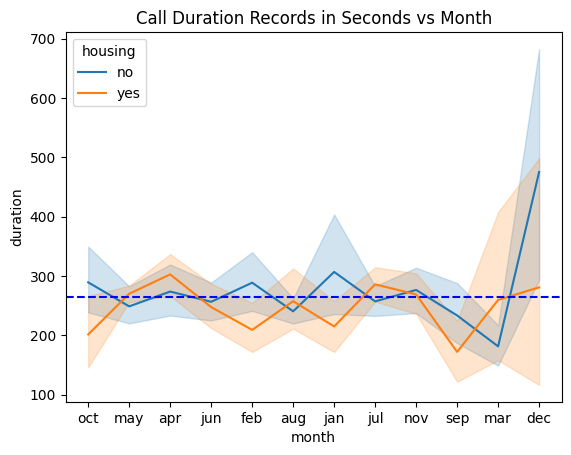

In [11]:
sns.lineplot(x = df['month'], y = df['duration'], hue = df['housing'])
plt.axhline(df['duration'].mean(),linestyle = '--',c = 'b')
plt.title('Call Duration Records in Seconds vs Month')
plt.show()

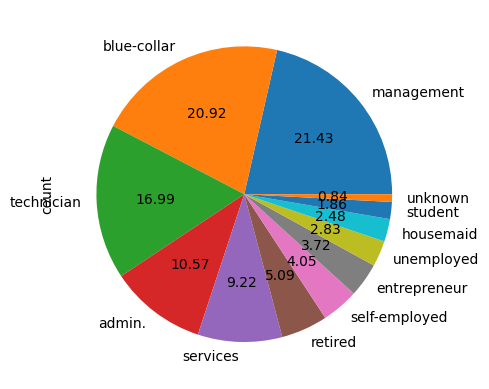

In [12]:
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')
plt.show()

In [13]:
management = df[df['job'] == 'management']
bluecollar = df[df['job'] == 'blue-collar']

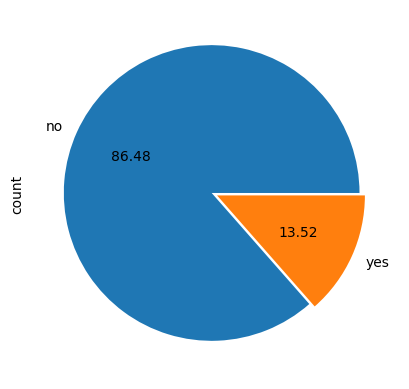

In [14]:
management['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f',
                            explode = [0.02,0.02])
plt.show()

<Axes: ylabel='balance'>

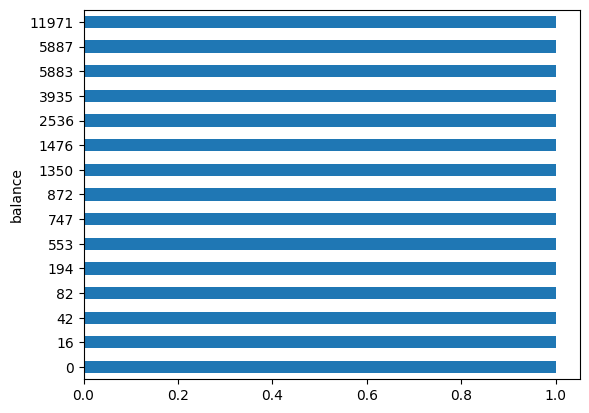

In [15]:
management['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh')

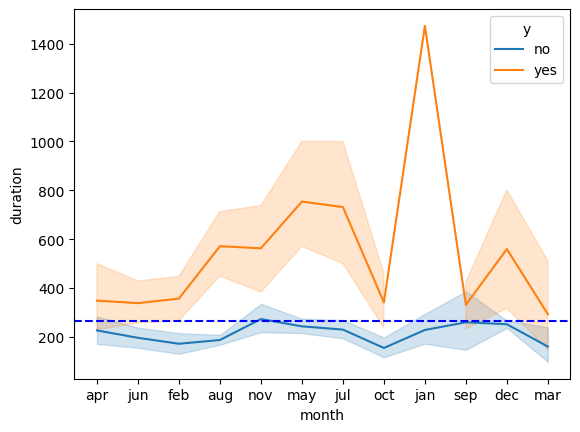

In [16]:
sns.lineplot(x = management['month'],y = management['duration'],hue = management['y'])
plt.axhline(264,linestyle = '--',c = 'b')
plt.show()

In [19]:
'''
1. pdays and previous these two columns shows IQR = 0, Hence we need to drop these two columns from the dataset
'''
# Create a copy of df
data = df.copy()
data.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4487,49,entrepreneur,divorced,secondary,no,32,no,no,cellular,5,feb,128,1,-1,0,unknown,no
4132,37,technician,married,secondary,no,1063,yes,no,cellular,31,jul,413,2,-1,0,unknown,no
3867,58,management,married,tertiary,no,172,no,no,cellular,19,aug,145,7,-1,0,unknown,no
3641,27,student,single,secondary,no,268,yes,no,cellular,13,may,528,1,358,2,failure,no
4079,53,entrepreneur,married,secondary,no,-118,yes,no,unknown,9,may,101,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,54,self-employed,divorced,primary,no,4382,yes,no,telephone,18,may,193,4,-1,0,unknown,no
2121,24,student,single,secondary,no,508,yes,no,telephone,18,may,12,3,374,1,other,no
3542,36,services,married,secondary,no,1746,yes,no,unknown,26,may,99,1,-1,0,unknown,no
3248,59,retired,divorced,secondary,no,1026,no,no,unknown,5,nov,669,1,-1,0,unknown,yes


In [20]:
# Encoding using get_dummies method
'''
Observation:
1. The Number of columns are increased, which impact badly w.r.t Model Building
'''
data = pd.get_dummies(data,drop_first = True, dtype = 'int')

In [25]:
# Encoding Technique: :Label Encoder

'''
1. Independent Columns can be encoded directly using LabelEncoder
2. Target column must be decoded separately either by using replace function or map function
'''
preprocess_data = df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Transforming all categorical columns : Independent Columns
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

# Transform Target Column to Numerical

df['y'] = df['y'].replace({'yes':1,'no':0})

In [50]:
# Concept of Data Leackage
'''
Step 1: Split the dataset into X and y
        X : Indepedent Columns
        y : Target Columns

Step 2: Split the datainto train and test
        train data: Seen Data
        test data : Unseen Data

Step 3: Try Balance the target column in case of classification problem
        Imbalance Technique : 1. Oversampling 2. Undersampling

Step 4: Use Scaling Technique:
        1. MinMaxScaler
        2. RobustScaler
        3. StandardScaler

Step 5: Model Building
'''

# Step 1: Split the Dataset into X and y

X = df.drop(columns = ['pdays','previous','y'],axis = 1)
y = df['y']

# Step 2: Split the Dataset into Train and Test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

# Step 3: Balancing the Target Column
from imblearn.over_sampling import SMOTE,ADASYN,SMOTEN
from imblearn.under_sampling import ClusterCentroids

sm = SMOTE(random_state= 42)
X_train,y_train = sm.fit_resample(X_train,y_train)

# Step 4: Scaling Technqiues

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0
